# Decision Tree Model

First, load the data and import the different libraries necessary

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path_orders = "/content/drive/MyDrive/Data Science Instacart Project/order_details_with_goods.csv"
orders = pd.read_csv(data_path_orders)
print('Total orders: {}'.format(orders.shape[0]))
orders.head(10)

Total orders: 32434489


,user_id,order_number,product_id,product_name,aisle_id,aisle,department_id,department
0,1,1,196,soda,77,soft drinks,7,beverages
1,1,1,14084,organic_unsweetened_vanilla_almond_milk,91,soy lactosefree,16,dairy eggs
2,1,1,12427,original_beef_jerky,23,popcorn jerky,19,snacks
3,1,1,26088,aged_white_cheddar_popcorn,23,popcorn jerky,19,snacks
4,1,1,26405,xl_pick-a-size_paper_towel_rolls,54,paper goods,17,household
5,1,2,196,soda,77,soft drinks,7,beverages
6,1,2,10258,pistachios,117,nuts seeds dried fruit,19,snacks
7,1,2,12427,original_beef_jerky,23,popcorn jerky,19,snacks
8,1,2,13176,bag_of_organic_bananas,24,fresh fruits,4,produce
9,1,2,26088,aged_white_cheddar_popcorn,23,popcorn jerky,19,snacks


In [ ]:
orders.info()
# orders["order_number"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   order_number   int64 
 2   product_id     int64 
 3   product_name   object
 4   aisle_id       int64 
 5   aisle          object
 6   department_id  int64 
 7   department     object
dtypes: int64(5), object(3)
memory usage: 1.9+ GB


## Create Decision Tree Function

Create Decision Tree as a function for easy calling.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

orders = orders.drop(["product_id","product_name","aisle_id","aisle","department_id"], axis=1)
orders = pd.get_dummies(data=orders, columns=['department'], drop_first=True)
orders

,user_id,order_number,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32434485,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32434486,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32434487,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# group user_id, count the number of orders and the number of rows (aka items purchased). Also count all the "true" values in department

import pandas as pd


grouped_orders = orders.groupby('user_id').agg(
    nbr_orders=('order_number', 'nunique'),  # Count of orders
    total_items_bought=('order_number', 'size'),  # Count of rows
    snacks_count=('department_snacks', 'sum'),  # Sum of 'true' values
    babies_count=('department_babies', 'sum'),  # Sum of 'true' values
    bakery_count=('department_bakery', 'sum'),  # Sum of 'true' values
    beverages_count=('department_beverages', 'sum'),  # Sum of 'true' values
    breakfast_count=('department_breakfast', 'sum'),  # Sum of 'true' values
    bulk_count=('department_bulk', 'sum'),  # Sum of 'true' values
    canned_count=('department_canned goods', 'sum'),  # Sum of 'true' values
    dairy_count=('department_dairy eggs', 'sum'),  # Sum of 'true' values
    deli_count=('department_deli', 'sum'),  # Sum of 'true' values
    pasta_count=('department_dry goods pasta', 'sum'),  # Sum of 'true' values
    frozen_count=('department_frozen', 'sum'),  # Sum of 'true' values
    household_count=('department_household', 'sum'),  # Sum of 'true' values
    international_count=('department_international', 'sum'),  # Sum of 'true' values
    meat_count=('department_meat seafood', 'sum'),  # Sum of 'true' values
    missing_count=('department_missing', 'sum'),  # Sum of 'true' values
    other_count=('department_other', 'sum'),  # Sum of 'true' values
    pantry_count=('department_pantry', 'sum'),  # Sum of 'true' values
    personal_count=('department_personal care', 'sum'),  # Sum of 'true' values
    pets_count=('department_pets', 'sum'),  # Sum of 'true' values
    produce_count=('department_produce', 'sum')  # Sum of 'true' values
)

grouped_orders

grouped_orders["average_items_per_order"] = (grouped_orders["total_items_bought"] / grouped_orders["nbr_orders"]).round(2)
grouped_orders["snacks_count_percent"] = (grouped_orders["snacks_count"] / grouped_orders["total_items_bought"]).round(2)
grouped_orders

# create a snacks_flag if a user_id purchases a snack and has 10 or more orders

grouped_orders['snacks_flag'] = 0  # Initialize the flag column
grouped_orders.loc[(grouped_orders['snacks_count'] > 0) & (grouped_orders['nbr_orders'] >= 15), 'snacks_flag'] = 1
grouped_orders

,nbr_orders,total_items_bought,snacks_count,babies_count,bakery_count,beverages_count,breakfast_count,bulk_count,canned_count,dairy_count,...,meat_count,missing_count,other_count,pantry_count,personal_count,pets_count,produce_count,average_items_per_order,snacks_count_percent,snacks_flag
user_id,,,,,,,,,,,,,,,,,,,,,
1,10,59,22,0,0,13,3,0,0,13,...,0,0,0,1,0,0,5,5.90,0.37,0
2,14,195,42,0,2,9,3,0,1,48,...,1,0,0,11,1,0,36,13.93,0.22,0
3,12,88,9,0,0,3,0,0,0,21,...,0,0,0,4,0,0,38,7.33,0.10,0
4,5,18,1,0,2,3,0,0,1,0,...,0,0,0,0,0,0,2,3.60,0.06,0
5,4,37,1,0,0,0,0,0,1,8,...,0,0,0,2,0,0,19,9.25,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,3,32,0,1,2,1,0,0,0,14,...,1,1,0,0,0,0,7,10.67,0.00,0
206206,67,285,42,0,2,33,1,0,9,39,...,2,0,1,14,10,0,34,4.25,0.15,1
206207,16,223,23,1,3,20,4,0,11,52,...,6,0,0,15,0,0,50,13.94,0.10,1


1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0

best min_samples_leaf =  1 :  Best AUC =  1.0


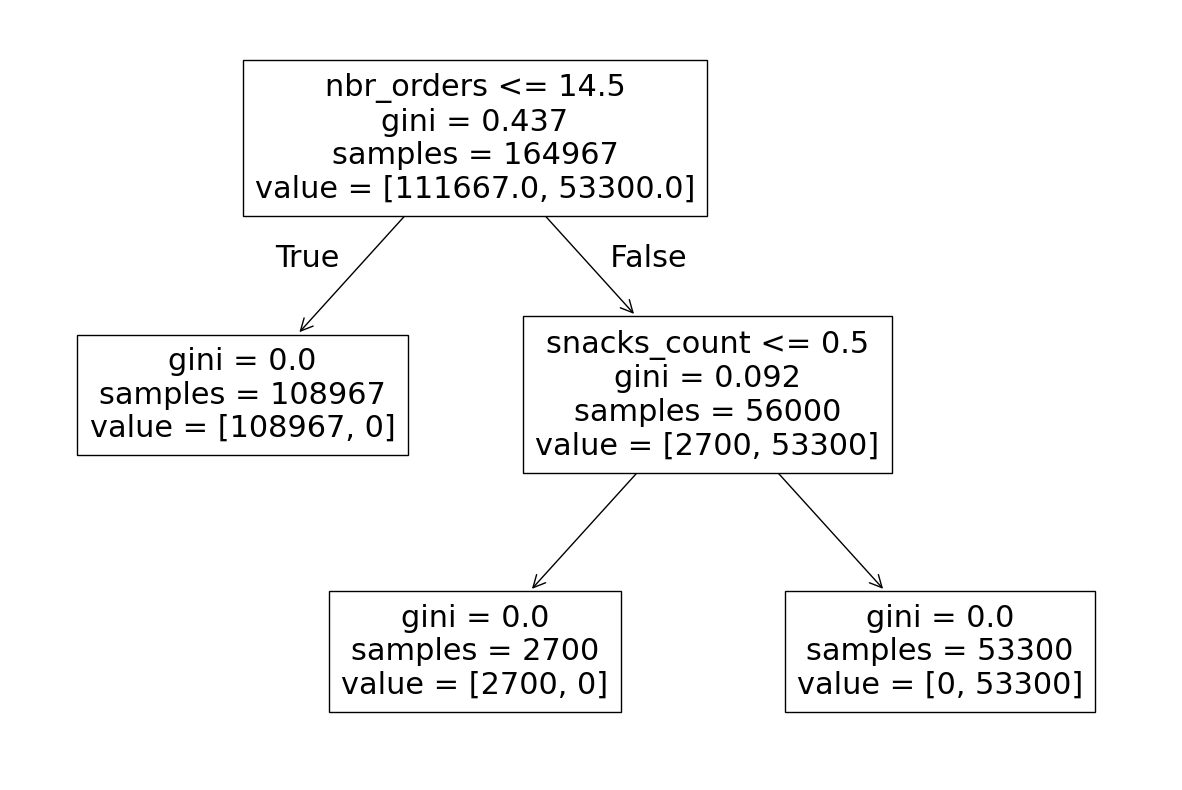

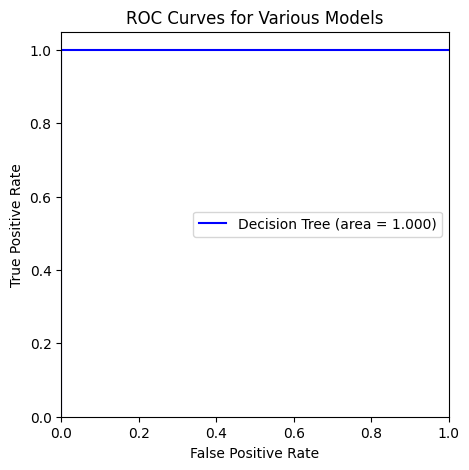

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc

def decision_tree():
    X = grouped_orders.drop("snacks_flag", axis=1)
    y = grouped_orders["snacks_flag"]

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=99)

    max_auc = 0
    opt_msl = 0

    for i in range(1, 11, 1):
        dt_model = DecisionTreeClassifier(min_samples_leaf=i)
        dt_model.fit(train_X, train_y)
        probs = dt_model.predict_proba(test_X)[:, 1]
        auc = roc_auc_score(test_y,probs).round(5)
        if auc > max_auc:
            max_auc = auc
            opt_msl = i
        print(i, auc)

    print("\nbest min_samples_leaf = ",opt_msl, ":  Best AUC = ",max_auc)

    tree_best = DecisionTreeClassifier(min_samples_leaf=opt_msl)
    tree_best.fit(train_X, train_y)

    plt.figure(figsize=(15,10))
    plot_tree(tree_best, feature_names=X.columns)
    plt.show()


    Y_pred_proba = tree_best.predict_proba(test_X)[:,1]
    fpr, tpr, _ = roc_curve(test_y, Y_pred_proba)
    roc_auc = roc_auc_score(test_y, Y_pred_proba)
    # Plot ROC curves
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'Decision Tree (area = {roc_auc:.3f})',color="blue")

    plt.xlim([0.00, 1.00])
    plt.ylim([0.00, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Various Models')
    plt.legend(loc="center right")
    plt.show()

    return tree_best

decision_tree()

## Original Code

In [ ]:
# Get dumb model - overall probability of a user purchasing snacks
orders_visual = orders
orders_visual["transaction_count"] = 1

# Step 1: Aggregate transaction counts by department
agg_data = orders_visual.groupby(['department_snacks'])['transaction_count'].sum().reset_index()
agg_data

# Step 2: Compute total transactions for each user
total_transactions = agg_data['transaction_count'].sum()
total_transactions

# Step 3: Get probability of snacks being in order
dumb_model_probability = (agg_data[agg_data['department_snacks'] == True][['transaction_count']] / total_transactions).round(2)

print(agg_data, total_transactions, dumb_model_probability)

   department_snacks  transaction_count
0              False            7181537
1               True             701098 7882635    transaction_count
1               0.09


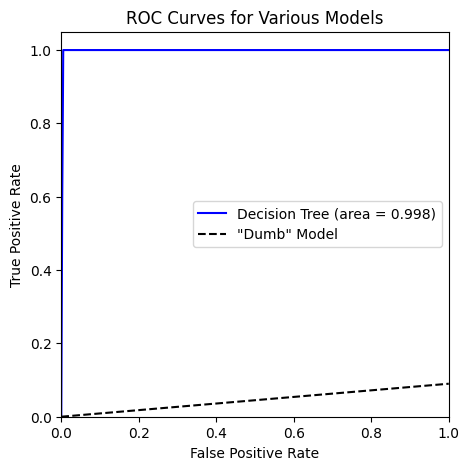

In [ ]:
from sklearn.metrics import roc_curve, auc

# Step 1: Identify the maximum order_number for each user_id
orders['rank'] = orders.groupby('user_id')['order_number'].rank(method='dense', ascending=False)

# Step 2: Separate datasets
max_order_dataset = orders[orders['rank'] <= 1]  # Maximum order_number
other_orders_dataset = orders[orders['rank'] > 1]  # All other order_numbers

# Drop the rank column if no longer needed
max_order = max_order_dataset.drop(columns=['rank'])
other_orders = other_orders_dataset.drop(columns=['rank'])

# Get Train/Test Data
test_X = max_order.drop(["department_snacks"], axis=1)
test_y = max_order["department_snacks"]

train_X = other_orders.drop(["department_snacks"], axis=1)
train_y = other_orders["department_snacks"]

tree_best = DecisionTreeClassifier(max_depth=23)
tree_best.fit(train_X, train_y)
Y_pred_proba = tree_best.predict_proba(test_X)[:,1]
fpr, tpr, _ = roc_curve(test_y, Y_pred_proba)
roc_auc = roc_auc_score(test_y, Y_pred_proba)


# Plot ROC curves
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (area = {roc_auc:.3f})',color="blue")

probability = float(dumb_model_probability.iloc[0, 0])

plt.plot([0.00, 1.00], [0.00, probability], 'k--', label='"Dumb" Model')
plt.xlim([0.00, 1.00])
plt.ylim([0.00, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc="center right")
plt.show()


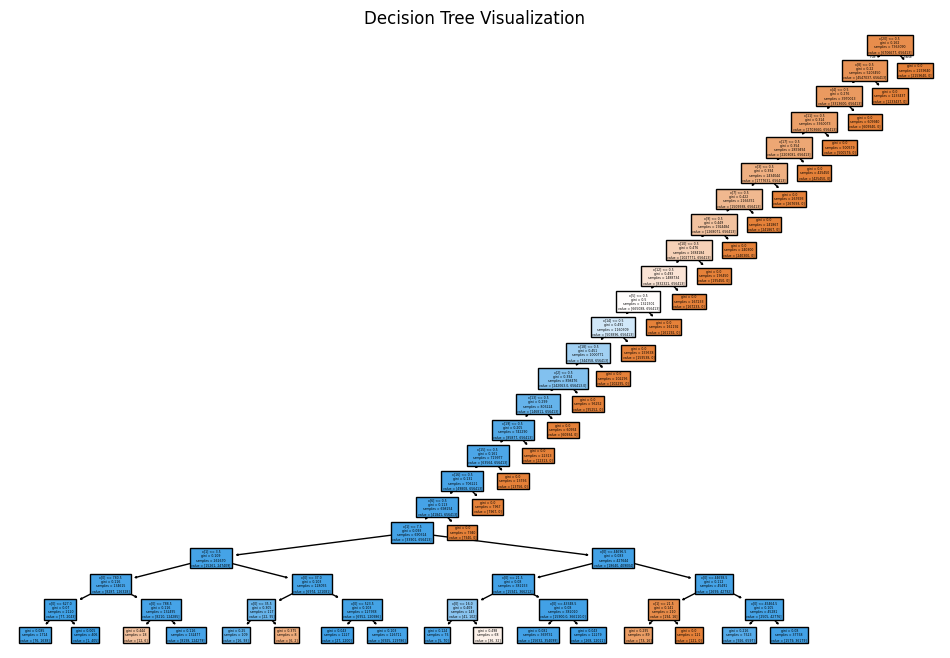

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree_best, feature_names=X.columns)
plt.show()

# Scrap Work:

In [ ]:
# orders = orders[orders['user_id'].between(1, 50000)]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
orders = orders.drop(["product_id","product_name","aisle_id","aisle","department_id"], axis=1)
orders

,user_id,order_number,department
0,1,1,beverages
1,1,1,dairy eggs
2,1,1,snacks
3,1,1,snacks
4,1,1,household
...,...,...,...
32434484,206209,13,dry goods pasta
32434485,206209,13,snacks
32434486,206209,13,snacks
32434487,206209,13,snacks


In [ ]:
orders = pd.get_dummies(data=orders, columns=['department'], drop_first=True)
orders

,user_id,order_number,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32434485,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32434486,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32434487,206209,13,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 22 columns):
 #   Column                      Dtype
---  ------                      -----
 0   user_id                     int64
 1   order_number                int64
 2   department_babies           bool 
 3   department_bakery           bool 
 4   department_beverages        bool 
 5   department_breakfast        bool 
 6   department_bulk             bool 
 7   department_canned goods     bool 
 8   department_dairy eggs       bool 
 9   department_deli             bool 
 10  department_dry goods pasta  bool 
 11  department_frozen           bool 
 12  department_household        bool 
 13  department_international    bool 
 14  department_meat seafood     bool 
 15  department_missing          bool 
 16  department_other            bool 
 17  department_pantry           bool 
 18  department_personal care    bool 
 19  department_pets             bool 
 20  department_produce    

In [ ]:
# group user_id, count the number of orders and the number of rows (aka items purchased). Also count all the "true" values in department

import pandas as pd


grouped_orders = orders.groupby('user_id').agg(
    nbr_orders=('order_number', 'nunique'),  # Count of orders
    total_items_bought=('order_number', 'size'),  # Count of rows
    snacks_count=('department_snacks', 'sum'),  # Sum of 'true' values
    babies_count=('department_babies', 'sum'),  # Sum of 'true' values
    bakery_count=('department_bakery', 'sum'),  # Sum of 'true' values
    beverages_count=('department_beverages', 'sum'),  # Sum of 'true' values
    breakfast_count=('department_breakfast', 'sum'),  # Sum of 'true' values
    bulk_count=('department_bulk', 'sum'),  # Sum of 'true' values
    canned_count=('department_canned goods', 'sum'),  # Sum of 'true' values
    dairy_count=('department_dairy eggs', 'sum'),  # Sum of 'true' values
    deli_count=('department_deli', 'sum'),  # Sum of 'true' values
    pasta_count=('department_dry goods pasta', 'sum'),  # Sum of 'true' values
    frozen_count=('department_frozen', 'sum'),  # Sum of 'true' values
    household_count=('department_household', 'sum'),  # Sum of 'true' values
    international_count=('department_international', 'sum'),  # Sum of 'true' values
    meat_count=('department_meat seafood', 'sum'),  # Sum of 'true' values
    missing_count=('department_missing', 'sum'),  # Sum of 'true' values
    other_count=('department_other', 'sum'),  # Sum of 'true' values
    pantry_count=('department_pantry', 'sum'),  # Sum of 'true' values
    personal_count=('department_personal care', 'sum'),  # Sum of 'true' values
    pets_count=('department_pets', 'sum'),  # Sum of 'true' values
    produce_count=('department_produce', 'sum'),  # Sum of 'true' values
)

grouped_orders

,nbr_orders,total_items_bought,snacks_count,babies_count,bakery_count,beverages_count,breakfast_count,bulk_count,canned_count,dairy_count,...,frozen_count,household_count,international_count,meat_count,missing_count,other_count,pantry_count,personal_count,pets_count,produce_count
user_id,,,,,,,,,,,,,,,,,,,,,
1,10,59,22,0,0,13,3,0,0,13,...,0,2,0,0,0,0,1,0,0,5
2,14,195,42,0,2,9,3,0,1,48,...,17,0,3,1,0,0,11,1,0,36
3,12,88,9,0,0,3,0,0,0,21,...,6,1,0,0,0,0,4,0,0,38
4,5,18,1,0,2,3,0,0,1,0,...,3,2,0,0,0,0,0,0,0,2
5,4,37,1,0,0,0,0,0,1,8,...,2,0,2,0,0,0,2,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,3,32,0,1,2,1,0,0,0,14,...,2,0,0,1,1,0,0,0,0,7
206206,67,285,42,0,2,33,1,0,9,39,...,76,12,4,2,0,1,14,10,0,34
206207,16,223,23,1,3,20,4,0,11,52,...,21,0,1,6,0,0,15,0,0,50


In [ ]:
grouped_orders["average_items_per_order"] = (grouped_orders["total_items_bought"] / grouped_orders["nbr_orders"]).round(2)
grouped_orders["snacks_count_percent"] = (grouped_orders["snacks_count"] / grouped_orders["total_items_bought"]).round(2)
grouped_orders

,nbr_orders,total_items_bought,snacks_count,babies_count,bakery_count,beverages_count,breakfast_count,bulk_count,canned_count,dairy_count,...,international_count,meat_count,missing_count,other_count,pantry_count,personal_count,pets_count,produce_count,average_items_per_order,snacks_count_percent
user_id,,,,,,,,,,,,,,,,,,,,,
1,10,59,22,0,0,13,3,0,0,13,...,0,0,0,0,1,0,0,5,5.90,0.37
2,14,195,42,0,2,9,3,0,1,48,...,3,1,0,0,11,1,0,36,13.93,0.22
3,12,88,9,0,0,3,0,0,0,21,...,0,0,0,0,4,0,0,38,7.33,0.10
4,5,18,1,0,2,3,0,0,1,0,...,0,0,0,0,0,0,0,2,3.60,0.06
5,4,37,1,0,0,0,0,0,1,8,...,2,0,0,0,2,0,0,19,9.25,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,3,32,0,1,2,1,0,0,0,14,...,0,1,1,0,0,0,0,7,10.67,0.00
206206,67,285,42,0,2,33,1,0,9,39,...,4,2,0,1,14,10,0,34,4.25,0.15
206207,16,223,23,1,3,20,4,0,11,52,...,1,6,0,0,15,0,0,50,13.94,0.10


In [ ]:
# create a snacks_flag if a user_id purchases a snack and has 10 or more orders

grouped_orders['snacks_flag'] = 0  # Initialize the flag column
grouped_orders.loc[(grouped_orders['snacks_count'] > 0) & (grouped_orders['nbr_orders'] >= 50), 'snacks_flag'] = 1

In [ ]:
grouped_orders['snacks_flag'].value_counts()

,count
snacks_flag,
0,195533
1,10676


In [ ]:
from sklearn.model_selection import train_test_split
X = grouped_orders.drop("snacks_flag", axis=1)
y = grouped_orders["snacks_flag"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


max_auc = 0
opt_msl = 0

for i in range(1, 11, 1):
  dt_model = DecisionTreeClassifier(min_samples_leaf=i)
  dt_model.fit(train_X, train_y)
  probs = dt_model.predict_proba(test_X)[:, 1]
  auc = roc_auc_score(test_y,probs).round(5)
  if auc > max_auc:
    max_auc = auc
    opt_msl = i
  print(i, auc)

print("\nbest min_samples_leaf = ",opt_msl, ":  Best AUC = ",max_auc)

tree_best = DecisionTreeClassifier(min_samples_leaf=opt_msl)
tree_best.fit(train_X, train_y)

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0

best min_samples_leaf =  1 :  Best AUC =  1.0


DecisionTreeClassifier()

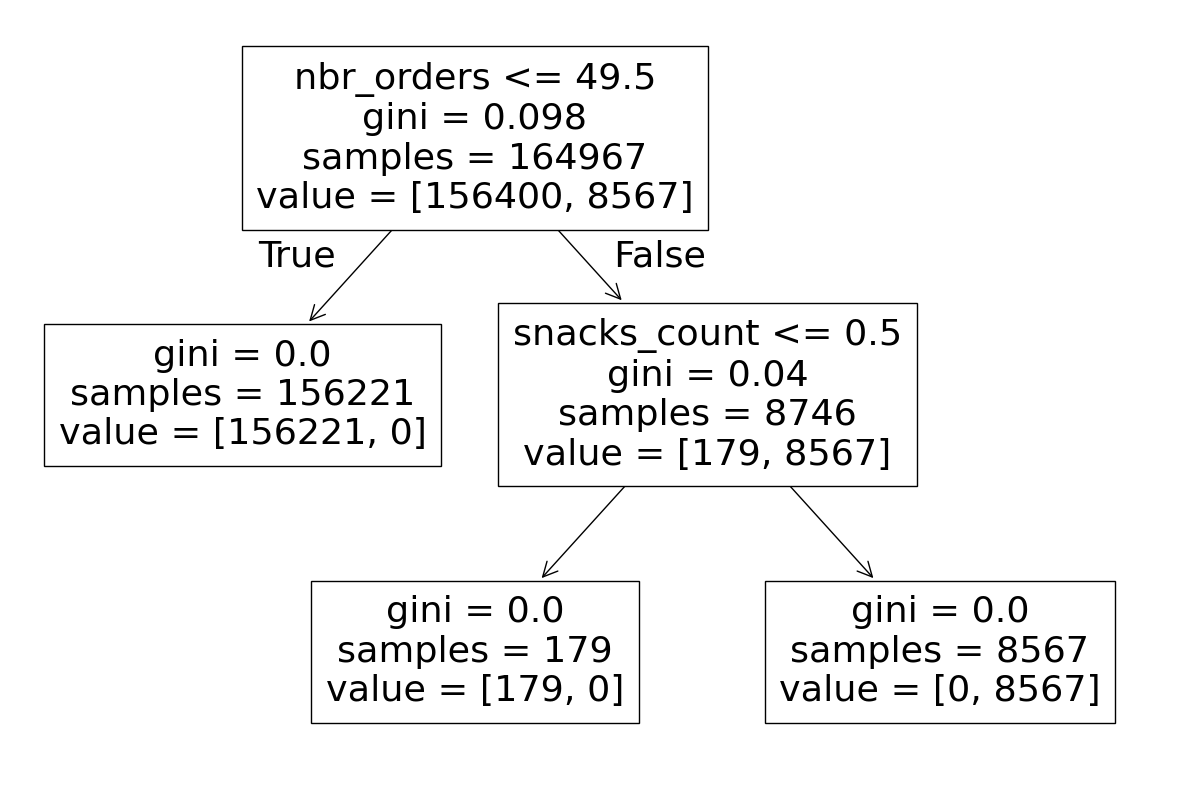

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree_best, feature_names=X.columns)
plt.show()

In [ ]:
# dataset already filtered for user_id with order_number > 2
# next step: separate test/ control by leaving out the maximum order number for each user id

# Step 1: Identify the maximum and second-highest order_number for each user_id
orders['rank'] = orders.groupby('user_id')['order_number'].rank(method='dense', ascending=False)

# Step 2: Separate datasets
max_to_third_order_dataset = orders[orders['rank'] <= 3]  # Maximum, second-highest, and third-highest order_number
other_orders_dataset = orders[orders['rank'] > 3]  # All other order_numbers

# Drop the rank column if no longer needed
max_to_third_order = max_to_third_order_dataset.drop(columns=['rank'])
other_orders = other_orders_dataset.drop(columns=['rank'])


In [ ]:
# max_to_third_order is the test set ~20% of records

max_to_third_order

,user_id,order_number,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
38,1,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39,1,8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40,1,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
41,1,8,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
42,1,8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882630,50000,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7882631,50000,8,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7882632,50000,8,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7882633,50000,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# other_orders is the training set ~80% of records

other_orders

,user_id,order_number,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882596,50000,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7882597,50000,5,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7882598,50000,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7882599,50000,5,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_X = max_to_third_order.drop(["department_snacks"], axis=1)
test_y = max_to_third_order["department_snacks"]

train_X = other_orders.drop(["department_snacks"], axis=1)
train_y = other_orders["department_snacks"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


max_auc = 0
opt_msl = 0

for i in range(10, 201, 10):
  dt_model = DecisionTreeClassifier(min_samples_leaf=i)
  dt_model.fit(train_X, train_y)
  probs = dt_model.predict_proba(test_X)[:, 1]
  auc = roc_auc_score(test_y,probs).round(5)
  if auc > max_auc:
    max_auc = auc
    opt_msl = i
  print(i, auc)

print("\nbest min_samples_leaf = ",opt_msl, ":  Best AUC = ",max_auc)

tree_best = DecisionTreeClassifier(min_samples_leaf=opt_msl)
tree_best.fit(train_X, train_y)

10 0.99758
20 0.9981
30 0.99825
40 0.9983
50 0.99831
60 0.9983
70 0.99831
80 0.9983
90 0.9983
100 0.99829
110 0.99829
120 0.99827
130 0.99825
140 0.99826
150 0.99825
160 0.99824
170 0.99822
180 0.99821
190 0.9982
200 0.99819

best min_samples_leaf =  50 :  Best AUC =  0.99831


DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree_best, feature_names=train_X)
plt.show()

NameError: name 'plt' is not defined